#  WRRF Trend Analysis

### 1) Libraries Import (REQUIRED)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator, FixedFormatter
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator
from matplotlib.font_manager import FontProperties
from scipy.stats import linregress

### 2) Data Import and Export (REQUIRED)

#### Define Functions for Data Import and Export (Required)

In [2]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [3]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")

#### OPTION 1) Import Data from Excel Macro

In [4]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 09-17-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


### Figures Settings

In [5]:
# Set default tick label size
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

# Set default font size for title, labels, and legend
plt.rcParams['axes.titlesize'] = 30  # Set the font size for plot titles
plt.rcParams['axes.labelsize'] = 24  # Set the font size for axis labels
plt.rcParams['legend.fontsize'] = 20  # Set the font size for legend

# Set default font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Set default font type for plot titles to bold
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

### 3) Import Other Data (REQUIRED)

In [6]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 03-25-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [7]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

In [8]:
# Load the Excel file into a DataFrame
df = pd.read_excel("U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/PFAS Toolbox_ColorsPalette.xlsx",sheet_name='ColorPalette_NonTOP')

def parse_rgb(rgb_string):
    # Check if rgb_string is a string and not empty
    if isinstance(rgb_string, str) and rgb_string:
        # Remove parentheses and split the string by commas
        rgb_values = rgb_string.strip('()').split(',')
        # Convert each value to float and return as a tuple
        return tuple(int(value)/255 for value in rgb_values)
    else:
        # Handle the case where rgb_string is not a string or is empty
        return None  # or return (0, 0, 0, 0) for a default transparent color, for example



# Create a dictionary with PFAS compounds as keys and corresponding colors as values
compound_colors_dict = {compound: parse_rgb(rgb) for compound, rgb in zip(df['Database'], df['New_RGB'])}
compound_colors_dict_abbrev = {abbrev: parse_rgb(rgb) for abbrev, rgb in zip(df['Abbrev'], df['New_RGB'])}

In [9]:
def create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, add_data_table=None, figsize=(10, 6),
                                      title='Average PFAS Concentrations by Month and Year', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, ylim=50):
    try:
        font = FontProperties(family='Arial')
        font_bold = FontProperties(family='Arial', weight='bold')
        # Replace NaN values with zeros in avg_pivot_table for plotting
        avg_pivot_table_filtered = avg_pivot_table.fillna(0).loc[:, (avg_pivot_table != 0).any(axis=0)]
        
        fig, ax1 = plt.subplots(figsize=figsize)

        # Stacked Bar Plot
        bottom = np.zeros(len(avg_pivot_table_filtered.index))
        for compound in avg_pivot_table_filtered.columns:
            color = compound_colors_dict.get(compound, 'grey')  # Default grey color
            avg_values = avg_pivot_table_filtered[compound].values
            std_dev_values = std_dev_pivot_table_filtered.get(compound, np.zeros_like(avg_values)) if std_dev_pivot_table is not None else np.zeros_like(avg_values)
            ax1.bar(avg_pivot_table_filtered.index, avg_values, width=0.35, bottom=bottom, color=color, label=compound, yerr=std_dev_values, capsize=0)
            bottom += avg_values

        # Scatter Plot with Trendline for Total PFAS
        if 'Total PFAS' in add_data_table.columns:
            scatter_x = add_data_table.index
            scatter_y = add_data_table['Total PFAS']
            ax1.scatter(scatter_x, scatter_y, color='black', label='Total PFAS', zorder=5)

            # Calculate trendline
            slope, intercept, r_value, p_value, std_err = linregress(range(len(scatter_x)), scatter_y)
            line = slope * np.arange(len(scatter_x)) + intercept
            ax1.plot(scatter_x, line, 'r--', label=f'Trendline: y={slope:.2f}x+{intercept:.2f}\nR²={r_value**2:.2f}\np-value = {p_value:.2f}')

        ax1.set_ylim(0, ylim)
        ax1.set_xlabel('Date (Month and Year)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax1.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax1.set_title(title, fontsize=title_fontsize, fontproperties=font_bold, pad=20)
        ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)
        
        # Combine legend handles and labels from both axes
        handles1, labels1 = ax1.get_legend_handles_labels()

        all_handles = handles1 
        all_labels = labels1
        
        ax1.legend(handles=all_handles, labels=all_labels, title='Legend', bbox_to_anchor=(1.05, 1.05), loc='upper left', fontsize=legend_fontsize, title_fontsize=legend_fontsize+2)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

### Dataset Prep

In [10]:
# Define the type or types you want to filter by
locations_to_include = ['Durham Influent','Durham Effluent','Forest Grove Influent','Forest Grove Effluent','Rock Creek Influent','Rock Creek Effluent',
                        'Hillsboro Influent','Hillsboro Effluent']  # replace with the types you're interested in
# Create the mask for types
type_mask = data_df['Sample Location'].isin(locations_to_include)
# Apply both masks to filter the dataframe
filtered_df = data_df[type_mask]

#Define quality grades to include
qual_grades=['Good', 'Probably Ok', 'Probably ok','probably ok']
# Create mask for quality 
qual_mask = filtered_df['Qual Summary (Grade for filtering)'].isin(qual_grades)
# Apply both masks to filter the dataframe
filtered_df = filtered_df[qual_mask]

filtered_df = filtered_df[~filtered_df['PFAS Compound'].str.contains('TOP', na=False)]

sample_locations=filtered_df['Sample Location'].unique()
compounds=filtered_df['PFAS Compound'].unique()

### Data Overview

#### Functions

In [11]:
def create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, add_data_table=None, figsize=(10, 6),
                                      title='Average PFAS Concentrations by Month and Year', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, ylim=50):
    try:
        font = FontProperties(family='Arial')
        font_bold = FontProperties(family='Arial', weight='bold')
        # Replace NaN values with zeros in avg_pivot_table for plotting
        avg_pivot_table_filtered = avg_pivot_table.fillna(0).loc[:, (avg_pivot_table != 0).any(axis=0)]
        
        fig, ax1 = plt.subplots(figsize=figsize)

        # Stacked Bar Plot
        bottom = np.zeros(len(avg_pivot_table_filtered.index))
        for compound in avg_pivot_table_filtered.columns:
            color = compound_colors_dict.get(compound, 'grey')  # Default grey color
            avg_values = avg_pivot_table_filtered[compound].values
            std_dev_values = std_dev_pivot_table_filtered.get(compound, np.zeros_like(avg_values)) if std_dev_pivot_table is not None else np.zeros_like(avg_values)
            ax1.bar(avg_pivot_table_filtered.index, avg_values, width=0.35, bottom=bottom, color=color, label=compound, yerr=std_dev_values, capsize=0)
            bottom += avg_values

        # Scatter Plot with Trendline for Total PFAS
        if 'Total PFAS' in add_data_table.columns:
            scatter_x = add_data_table.index
            scatter_y = add_data_table['Total PFAS']
            ax1.scatter(scatter_x, scatter_y, color='black', label='Total PFAS', zorder=5)

            # Calculate trendline
            slope, intercept, r_value, p_value, std_err = linregress(range(len(scatter_x)), scatter_y)
            line = slope * np.arange(len(scatter_x)) + intercept
            ax1.plot(scatter_x, line, 'r--', label=f'Trendline: y={slope:.2f}x+{intercept:.2f}\nR²={r_value**2:.2f}\np-value = {p_value:.2f}')

        ax1.set_ylim(0, ylim)
        ax1.set_xlabel('Sample Date', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax1.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax1.set_title(title, fontsize=title_fontsize, fontproperties=font_bold, pad=20)
        ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)
        
        # Combine legend handles and labels from both axes
        handles1, labels1 = ax1.get_legend_handles_labels()

        all_handles = handles1
        all_labels = labels1
        
        ax1.legend(handles=all_handles, labels=all_labels, title='Legend', bbox_to_anchor=(1.05, 1.05), loc='upper left', fontsize=legend_fontsize, title_fontsize=legend_fontsize+2)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

In [12]:
def create_filtered_pivot_tables(data_df, sample_location=None, qual_summary=None, type=None, pfas_compound=None):
    """
    Create filtered pivot tables with customizable filters and aggregation for average, count, and standard deviation.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        type (list of str, optional): List of 'Type' values to filter the data (default is None).
        pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        tuple of pd.DataFrame: Tuple containing three pivot tables with 'PFAS Compound' as columns, 'Sample Date' as rows,
                               and values are average, count, and standard deviation of 'Quant Incl Estimates Incl Qual Flags'.
    """
    try:
        # Apply filters based on specified conditions
        filtered_data = data_df
        if sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(sample_location)]
        if qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(qual_summary)]
        if type:
            filtered_data = filtered_data[filtered_data['Type'].isin(type)]
        if pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(pfas_compound)]

        # Create pivot tables
        avg_pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                         index='Sample Date', columns='PFAS Compound',
                                         aggfunc='mean', fill_value=np.nan)
        count_pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                           index='Sample Date', columns='PFAS Compound',
                                           aggfunc='count', fill_value=0)
        std_dev_pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                             index='Sample Date', columns='PFAS Compound',
                                             aggfunc='std', fill_value=np.nan)

        return avg_pivot_table, count_pivot_table, std_dev_pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None, None


#### Get Tables and Create Plot

In [13]:
sample_locations

array(['Durham Influent', 'Forest Grove Effluent',
       'Forest Grove Influent', 'Hillsboro Influent', 'Durham Effluent',
       'Rock Creek Influent', 'Rock Creek Effluent', 'Hillsboro Effluent'],
      dtype=object)

In [14]:
avg_pivot_table, count_pivot_table, std_dev_pivot_table=create_filtered_pivot_tables(data_df=filtered_df, sample_location=['Durham Influent'], qual_summary=None, type=None, pfas_compound=None)
avg_pivot_table

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,3:3 FTCA,4:2 Fluorotelomersulfonic acid,5:3 FTCA,6:2 Fluorotelomersulfonic acid,7:3 FTCA,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Sample Date,,,,,,,,,,,,,,,,,,,,,
2019-08-22,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.00,0.0,42.00,0.0,8.90,0.0,0.0,0.0
2019-11-04,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.00,0.0,52.00,0.0,7.90,0.0,0.0,0.0
2020-01-23,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.00,8.4,20.00,0.0,7.50,0.0,0.0,0.0
2020-04-23,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.00,8.9,280.00,0.0,8.80,0.0,0.0,0.0
2020-06-12,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.00,8.2,110.00,0.0,11.00,0.0,0.0,0.0
2020-09-23,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.000,NaN,0.00,41.0,11.00,0.0,9.20,0.0,0.0,0.0
2020-12-10,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.00,10.0,7.60,0.0,7.00,0.0,0.0,0.0
2021-07-21,0.0,0.0,NaN,0.0,NaN,1.9,NaN,0.0,0.0,1.7,...,0.550,0.0,0.00,6.1,3.50,0.0,4.90,0.0,0.0,0.0
2022-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


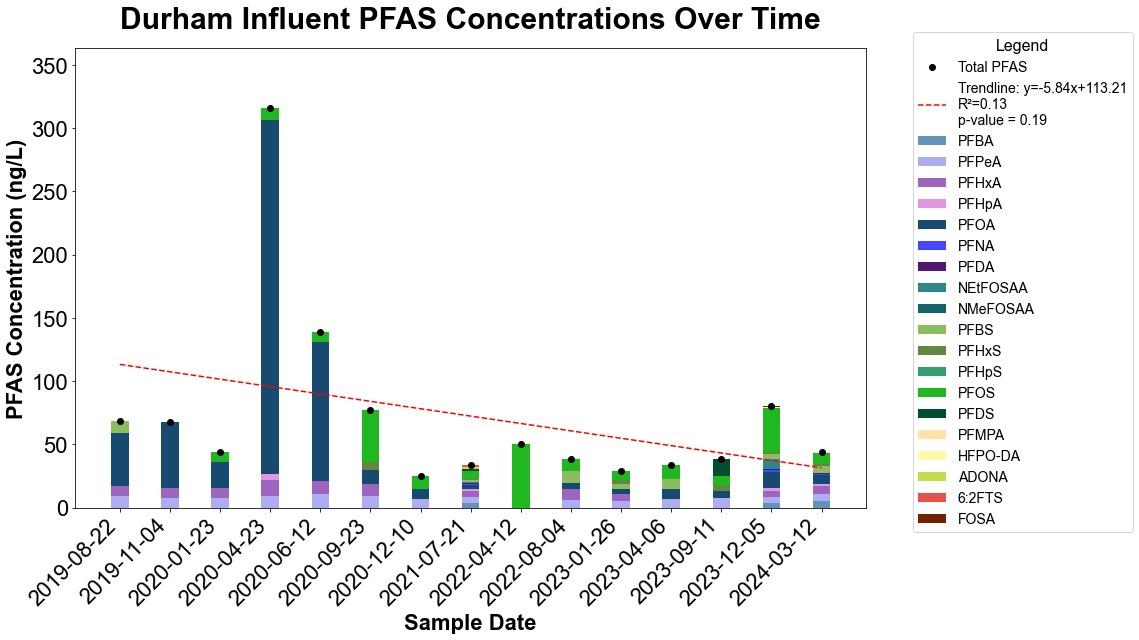

<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


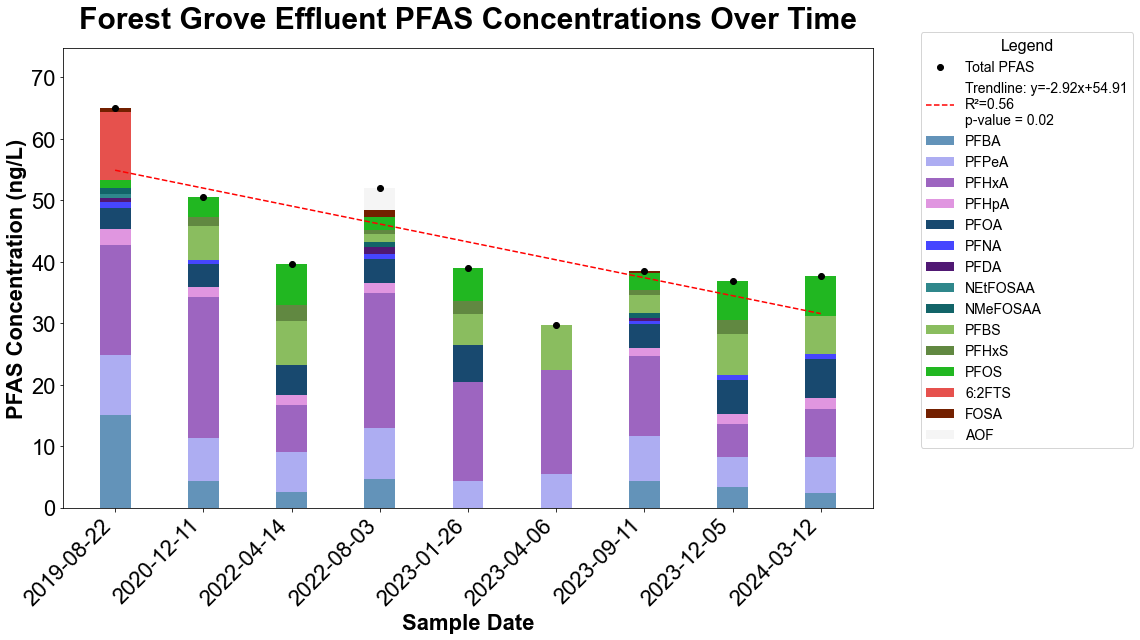

<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


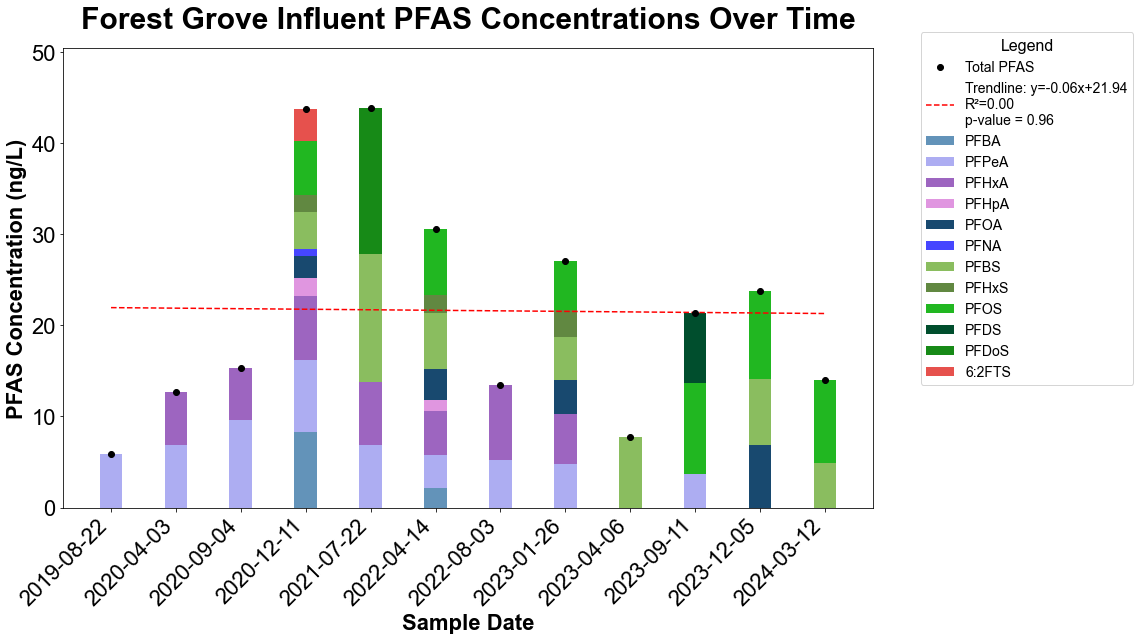

<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


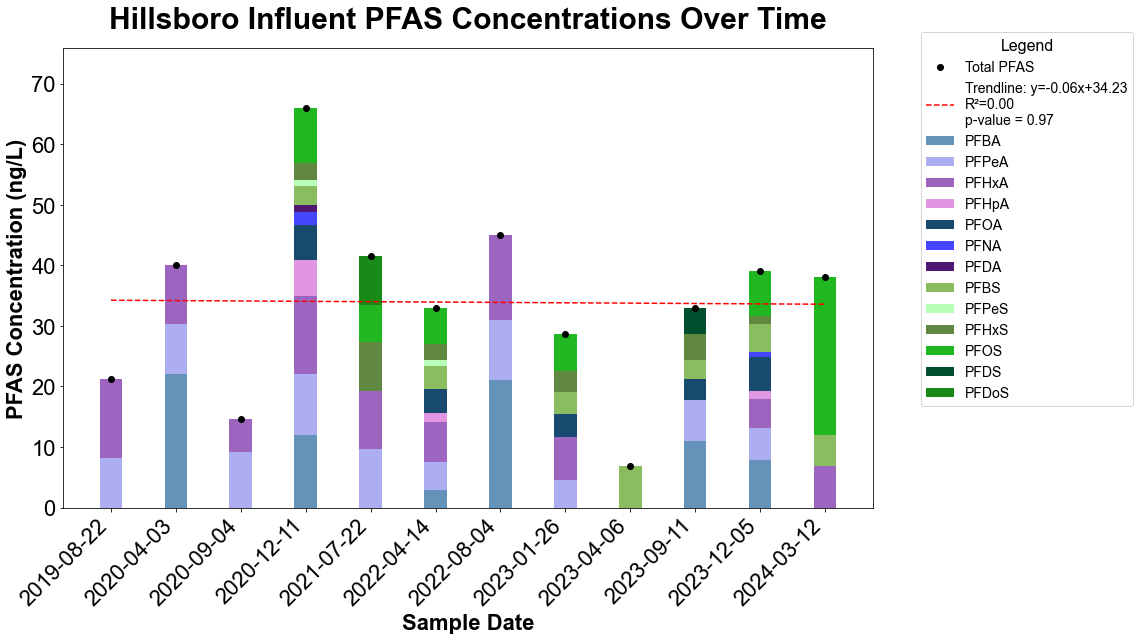

<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


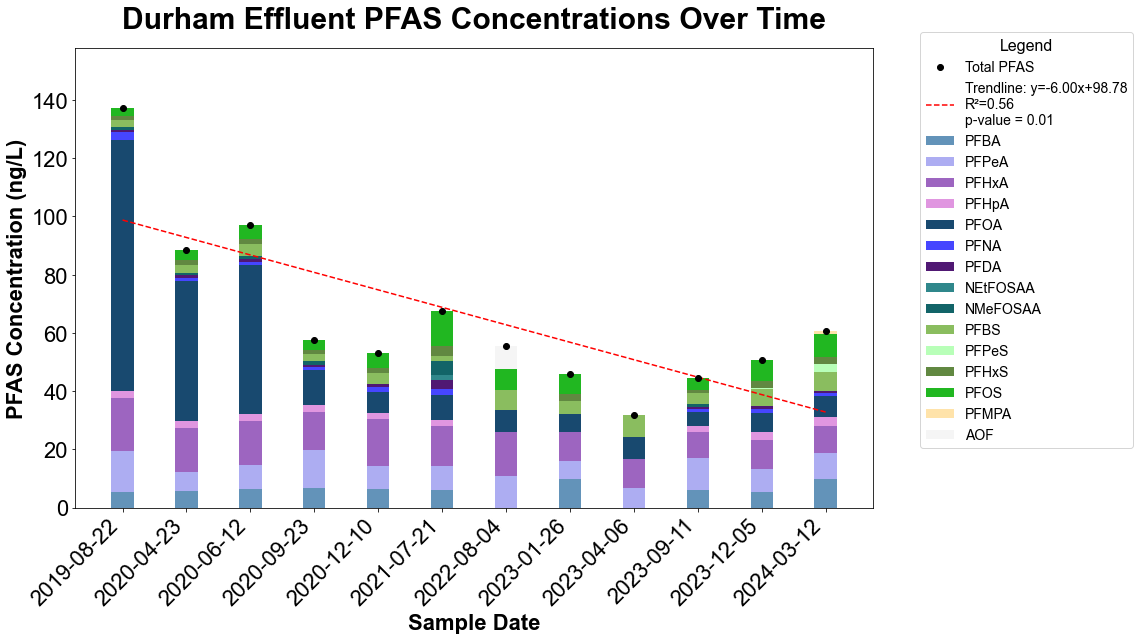

<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


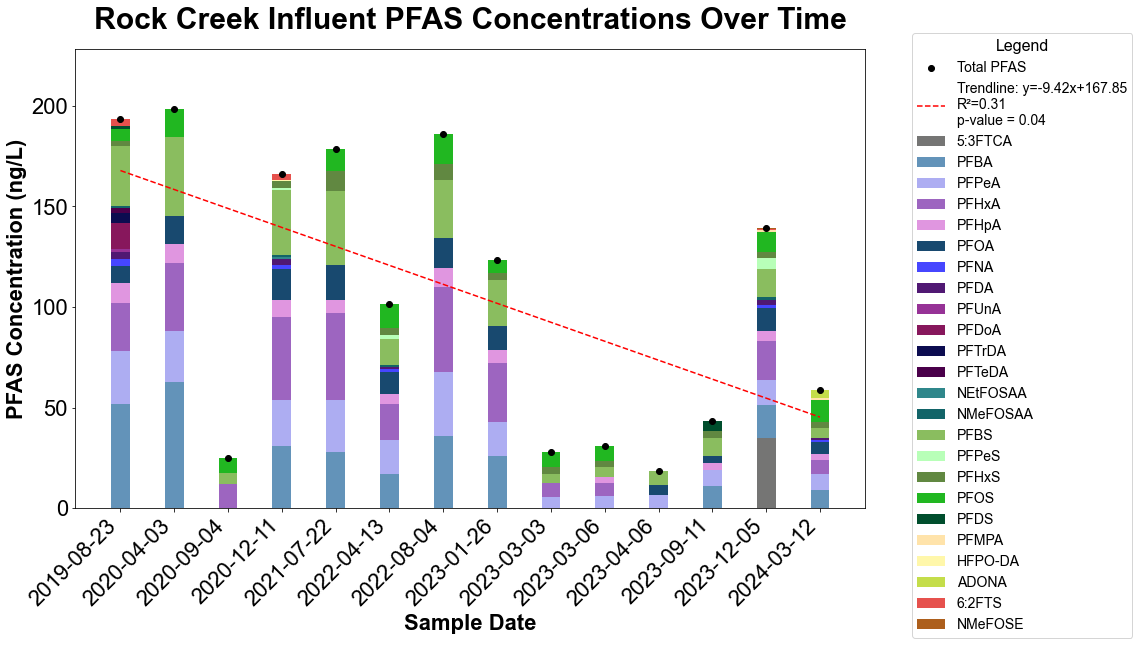

<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


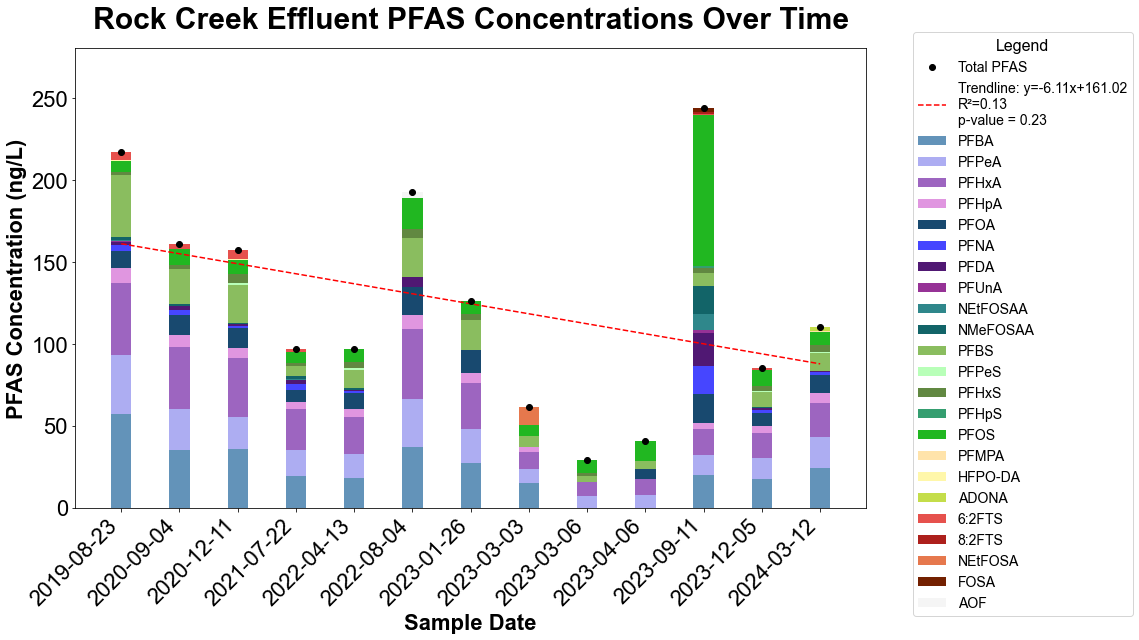

<ipython-input-11-d0a0901648e8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_pivot_table_filtered.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font)


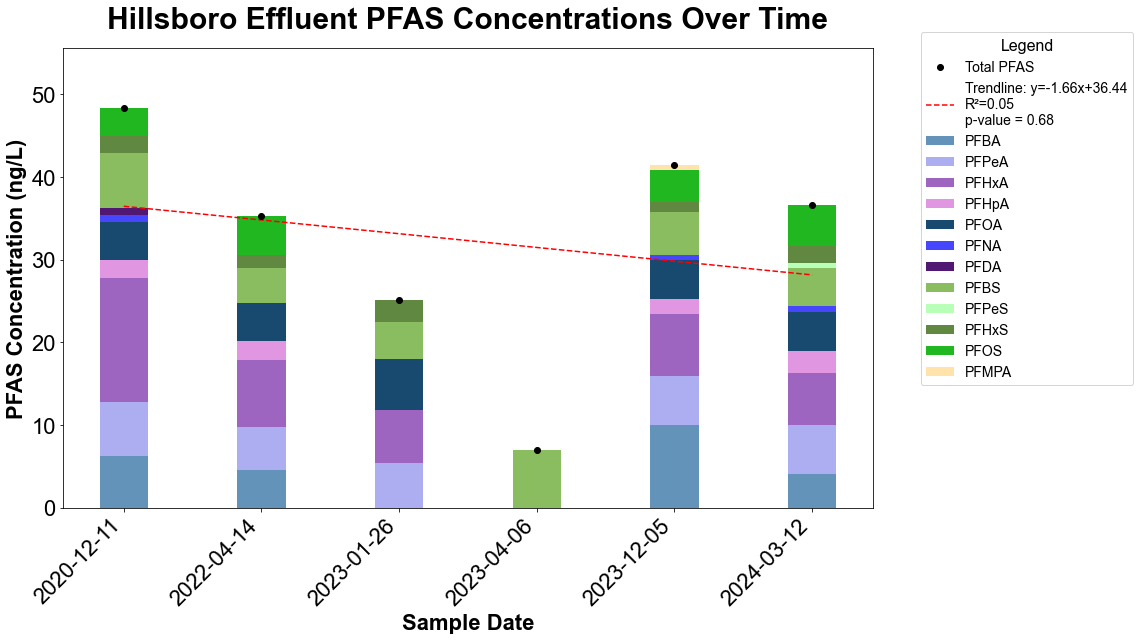

In [15]:
for location in sample_locations:
    avg_pivot_table, count_pivot_table, std_dev_pivot_table=create_filtered_pivot_tables(data_df=filtered_df, sample_location=[location], qual_summary=None, type=None, pfas_compound=None)

    avg_pivot_table.columns = avg_pivot_table.columns.map(pfas_mapping)

    desired_order = df['Abbrev'].tolist()  # Convert to list if not already
    # Filter the desired_order to only include columns that exist in df
    filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]
    # Reorder columns by indexing df with the desired order
    avg_pivot_table = avg_pivot_table[filtered_order]

    new_indexes=[]
    for index in avg_pivot_table.index:
        new_index= str(index).replace(' 00:00:00','')
        new_indexes.append(new_index)
    avg_pivot_table.index=new_indexes
    
    for column in avg_pivot_table.columns:
        if avg_pivot_table[column].sum() == 0:
            avg_pivot_table.drop(column, axis=1,inplace=True)
        
    TotalPFAS=pd.DataFrame(avg_pivot_table.sum(axis=1), columns=['Total PFAS'])

    max=TotalPFAS.max()*1.15
    
    title=location+" PFAS Concentrations Over Time"

    create_stacked_bar_chart_filtered(avg_pivot_table=avg_pivot_table, std_dev_pivot_table=None, add_data_table=TotalPFAS, figsize=(16, 9),
                                        title=title, compound_colors_dict=compound_colors_dict_abbrev,
                                        title_fontsize=30, axis_label_fontsize=22, tick_label_fontsize=22, legend_fontsize=14, ylim=max[0])



### Frequency of PFAS compound detection

#### Functions

In [16]:
def create_pivot_table_from_dataframe(data_df,value_column='All (w BDL= MDL/2) Incl Qual Flags', filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.
        value_column (str, optional): The column to perform the aggregation on.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values=value_column,
                                     index='Sample Location', columns='PFAS Compound',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [17]:
def create_non_zero_count_pivot_table(data_df, value_column='All (w BDL= MDL/2) Incl Qual Flags', 
                                      filter_qual_summary=None, filter_sample_location=None, 
                                      filter_type=None, filter_pfas_compound=None):
    """
    Create a pivot table that counts non-zero entries for each PFAS Compound and Type at specific locations.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List to filter by 'Qual Summary (Grade for filtering)'.
        filter_sample_location (list of str, optional): List to filter by 'Sample Location'.
        filter_type (list of str, optional): List to filter by 'Type'.
        filter_pfas_compound (list of str, optional): List to filter by 'PFAS Compound'.
        value_column (str, optional): The column to perform the aggregation on.

    Returns:
        pd.DataFrame: A pivot table counting non-zero values.
    """
    try:
        # Filter data based on provided criteria
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]
        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Define a custom aggregation function to count non-zero entries
        def count_non_zero(x):
            return (x != 0).sum()

        # Create the pivot table
        pivot_table = pd.pivot_table(filtered_data, values=value_column, index='Sample Location', 
                                     columns='PFAS Compound', aggfunc=count_non_zero, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


#### Get the sample count table

In [18]:
count_pivot= create_pivot_table_from_dataframe(data_df=filtered_df,value_column='Quant Incl Estimates Incl Qual Flags', filter_qual_summary=qual_grades, filter_sample_location=None, filter_type=['Influent','Effluent'], filter_pfas_compound=None, aggfunc='count')

count_pivot.columns = count_pivot.columns.map(pfas_mapping)

count_pivot


PFAS Compound,10:2FTS,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,...,PFNA,PFODA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Effluent,11,13,2.0,13,2.0,11,2.0,13,13,13,...,13,10,13,13,13,13,13,13,13,13
Durham Influent,13,15,2.0,15,2.0,13,2.0,15,15,15,...,15,12,15,16,15,15,15,15,15,15
Forest Grove Effluent,7,9,2.0,9,2.0,8,2.0,9,9,9,...,9,7,9,9,9,9,9,9,9,9
Forest Grove Influent,10,10,NaN,10,NaN,8,NaN,10,10,10,...,10,10,10,12,11,10,10,10,10,10
Hillsboro Effluent,4,6,2.0,6,2.0,5,2.0,6,6,6,...,6,4,6,6,6,6,6,6,6,6
Hillsboro Influent,10,11,1.0,11,1.0,9,1.0,11,11,11,...,11,10,11,12,11,11,11,11,11,11
Rock Creek Effluent,10,14,4.0,14,4.0,12,2.0,14,14,14,...,14,10,14,14,14,14,14,14,14,14
Rock Creek Influent,11,15,4.0,15,4.0,13,4.0,15,15,15,...,15,11,15,15,15,15,15,15,15,15


### Get table for number of samples not equal to zero

In [19]:
count_Not0__pivot = create_non_zero_count_pivot_table(data_df=filtered_df, 
                                                value_column='Quant Incl Estimates Incl Qual Flags', 
                                                filter_qual_summary=qual_grades, 
                                                filter_type=['Influent', 'Effluent'])
count_Not0__pivot.columns = count_Not0__pivot.columns.map(pfas_mapping)

count_Not0__pivot


PFAS Compound,10:2FTS,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,...,PFNA,PFODA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Effluent,0,0,0.0,0,0.0,0,0.0,0,0,0,...,10,0,0,12,13,2,13,0,0,0
Durham Influent,0,0,0.0,0,0.0,1,0.0,0,0,1,...,4,0,1,14,15,0,15,0,0,0
Forest Grove Effluent,0,0,0.0,0,0.0,1,0.0,0,0,0,...,6,0,3,8,8,0,9,0,0,0
Forest Grove Influent,0,0,NaN,0,NaN,1,NaN,0,0,0,...,1,0,0,6,4,0,9,0,0,0
Hillsboro Effluent,0,0,0.0,0,0.0,0,0.0,0,0,0,...,3,0,0,4,5,1,5,0,0,0
Hillsboro Influent,0,0,0.0,0,0.0,0,0.0,0,0,0,...,2,0,0,6,5,2,10,0,0,0
Rock Creek Effluent,0,0,0.0,0,0.0,6,0.0,1,0,1,...,9,0,2,14,12,4,14,0,0,3
Rock Creek Influent,0,0,0.0,0,1.0,3,0.0,0,0,1,...,6,0,0,12,12,4,14,1,1,1


#### Get table with percentage of times compound was not zero

In [20]:
pivot_PercentNotZero=count_Not0__pivot/count_pivot*100
pivot_PercentNotZero

PFAS Compound,10:2FTS,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,...,PFNA,PFODA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Effluent,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,76.923077,0.0,0.000000,92.307692,100.000000,15.384615,100.000000,0.000000,0.000000,0.000000
Durham Influent,0.0,0.0,0.0,0.0,0.0,7.692308,0.0,0.000000,0.0,6.666667,...,26.666667,0.0,6.666667,87.500000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000
Forest Grove Effluent,0.0,0.0,0.0,0.0,0.0,12.500000,0.0,0.000000,0.0,0.000000,...,66.666667,0.0,33.333333,88.888889,88.888889,0.000000,100.000000,0.000000,0.000000,0.000000
Forest Grove Influent,0.0,0.0,NaN,0.0,NaN,12.500000,NaN,0.000000,0.0,0.000000,...,10.000000,0.0,0.000000,50.000000,36.363636,0.000000,90.000000,0.000000,0.000000,0.000000
Hillsboro Effluent,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,50.000000,0.0,0.000000,66.666667,83.333333,16.666667,83.333333,0.000000,0.000000,0.000000
Hillsboro Influent,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,18.181818,0.0,0.000000,50.000000,45.454545,18.181818,90.909091,0.000000,0.000000,0.000000
Rock Creek Effluent,0.0,0.0,0.0,0.0,0.0,50.000000,0.0,7.142857,0.0,7.142857,...,64.285714,0.0,14.285714,100.000000,85.714286,28.571429,100.000000,0.000000,0.000000,21.428571
Rock Creek Influent,0.0,0.0,0.0,0.0,25.0,23.076923,0.0,0.000000,0.0,6.666667,...,40.000000,0.0,0.000000,80.000000,80.000000,26.666667,93.333333,6.666667,6.666667,6.666667


#### Get pivot table with average concentration

In [21]:
avg_pivot= create_pivot_table_from_dataframe(data_df=filtered_df,value_column='Quant Incl Estimates Incl Qual Flags', filter_qual_summary=qual_grades, filter_sample_location=None, filter_type=['Influent','Effluent'], filter_pfas_compound=None, aggfunc='mean')

avg_pivot.columns = avg_pivot.columns.map(pfas_mapping)

avg_pivot

PFAS Compound,10:2FTS,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,...,PFNA,PFODA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Effluent,0,0,0.0,0,0.00,0.000000,0.0,0.000000,0,0.000000,...,1.074615,0,0.000000,5.538462,20.038462,0.233846,9.030769,0.00,0.00,0.000000
Durham Influent,0,0,0.0,0,0.00,0.146154,0.0,0.000000,0,0.113333,...,0.260000,0,0.166667,15.406250,38.693333,0.000000,7.068000,0.00,0.00,0.000000
Forest Grove Effluent,0,0,0.0,0,0.00,1.375000,0.0,0.000000,0,0.000000,...,0.523333,0,0.270000,3.822222,4.188889,0.000000,6.611111,0.00,0.00,0.000000
Forest Grove Influent,0,0,NaN,0,NaN,0.450000,NaN,0.000000,0,0.000000,...,0.076000,0,0.000000,3.941667,1.490909,0.000000,5.460000,0.00,0.00,0.000000
Hillsboro Effluent,0,0,0.0,0,0.00,0.000000,0.0,0.000000,0,0.000000,...,0.368333,0,0.000000,2.833333,4.133333,0.108333,4.816667,0.00,0.00,0.000000
Hillsboro Influent,0,0,0.0,0,0.00,0.000000,0.0,0.000000,0,0.000000,...,0.276364,0,0.000000,5.058333,2.072727,0.174545,6.954545,0.00,0.00,0.000000
Rock Creek Effluent,0,0,0.0,0,0.00,1.477500,0.0,0.067143,0,0.178571,...,2.435714,0,0.195000,15.142857,9.550000,0.230000,17.171429,0.00,0.00,0.181429
Rock Creek Influent,0,0,0.0,0,8.75,0.584615,0.0,0.000000,0,0.286667,...,0.786667,0,0.000000,7.900000,8.680000,0.875333,15.040000,0.16,0.32,0.106667


#### Export Tables

In [22]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Count': count_pivot,
       'Count_Not_0': count_Not0__pivot,
       'Percent_Not_0':pivot_PercentNotZero,
       'Average': avg_pivot}

#filename: The name of the Excel file to write to.
filename= 'WRRF_Trend_Analysis.xlsx'
dfs_to_excel(dfs, filename)

PermissionError: [Errno 13] Permission denied: 'WRRF_Trend_Analysis.xlsx'

### Trend Analysis

#### Functions

In [ ]:
def create_multilevel_pivot_table(data_df, filter_type=None, filter_qual_summary=None, filter_sample_location=None, filter_dominant_contributor=None, start_date=None, end_date=None):
    """
    Create a multilevel pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sample Location', 'Dominant Contributor', and 'Sample Date' columns.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_dominant_contributor (list of str, optional): List of 'Dominant Contributor' values to filter the data (default is None).
        start_date (str, optional): Start date in 'YYYY-MM-DD' format (default is None).
        end_date (str, optional): End date in 'YYYY-MM-DD' format (default is None).

    Returns:
        pd.DataFrame: The multilevel pivot table with average values.
    """
    try:
        # Apply filters based on user-provided values
        filtered_data = data_df

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_dominant_contributor:
            filtered_data = filtered_data[filtered_data['Dominant Contributor'].isin(filter_dominant_contributor)]

        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create the pivot table with multilevel rows
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index=['Sample Location', 'Sample Date'],
                                     columns='PFAS Compound', aggfunc='mean',fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [ ]:
def plot_pfas_concentration_vs_date(df, color_dict, ncols=3, nrows=2, figsize=(15, 10), title='PFAS Concentration Over Time'):
    """
    Create line plots of PFAS compound concentrations vs. sample dates for all columns in the pivot table.
    Each compound is plotted in a separate subplot and includes trendlines and RSD.
    
    Args:
        df (pd.DataFrame): DataFrame with sample dates as index and PFAS compounds as columns.
        color_dict (dict): Dictionary mapping PFAS compound names to colors for the plot.
        ncols (int): Number of columns in the subplot grid.
        nrows (int): Number of rows in the subplot grid.
        figsize (tuple): Figure size.
        title (str): Title for the entire plot.
    
    Returns:
        None; displays matplotlib scatter plots.
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten the array to make indexing easier

    # Calculate the overall max concentration multiplied by 1.15
    max_concentration = df.max().max() * 1.15

    # Determine the overall date range for the x-axis
    min_date = df.index.min()
    max_date = df.index.max()

    # Loop through each compound and its corresponding subplot
    for idx, compound in enumerate(df.columns):
        ax = axes[idx]  # Select the appropriate subplot
        data = df[compound].dropna()
        if compound in color_dict:
            # Plot with specific color if available
            ax.plot(data.index, data, color=color_dict[compound], label=compound, alpha=1, marker='o', markersize=10)
        else:
            # Default color if compound not in color dictionary
            ax.plot(data.index, data, label=compound, alpha=1, marker='o', markersize=10)
        
        # Calculate and plot trendline
        if len(data) > 1:
            x = np.arange(len(data))
            y = data.values
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            line = slope * x + intercept
            rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD
            trendline_label = f'y={slope:.2f}x+{intercept:.2f}\nR²={r_value**2:.2f}, RSD={rsd:.2f}%'
            ax.plot(data.index, line, 'r--', label=trendline_label)
        
        ax.set_ylim(0, max_concentration)
        ax.set_xlim(min_date - pd.Timedelta(days=30), max_date + pd.Timedelta(days=30))
        ax.legend(loc='upper right')
        ax.tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for i in range(len(df.columns), nrows*ncols):
        axes[i].set_visible(False)  # Hide unused subplots
        
    # Set a common xlabel and ylabel
    fig.text(0.5, -0.02, 'Sample Date', ha='center', va='center', fontsize=24, fontweight='bold')
    fig.text(-0.01, 0.5, 'PFAS Concentration (ng/L)', ha='center', va='center', rotation='vertical', fontsize=24, fontweight='bold')
    fig.suptitle(title, fontsize=30, fontweight='bold')

    plt.tight_layout()
    plt.show()

#### Get Table with Timeseries Data

In [ ]:
new_color_dict = {'HFPO-DA': 'grey',
                  'NEtFOSAA': '#003f5c',
                  'NMeFOSAA': '#ff7c43',
                  'PFBS': '#2f4b7c',
                  'PFBA': '#a05195',
                  'PFHxS': '#d45087',
                  'PFNA': '#f95d6a',
                  'PFOS': '#665191',
                  'PFOA': '#ffa600'    
}

In [ ]:
pivot=create_multilevel_pivot_table(data_df=filtered_df, filter_type=None, filter_qual_summary=None, filter_sample_location=None, filter_dominant_contributor=None, start_date=None, end_date=None)
pivot.columns = pivot.columns.map(pfas_mapping)
pivot=pivot[['HFPO-DA','NEtFOSAA','NMeFOSAA','PFBS','PFBA','PFHxS','PFNA','PFOS','PFOA']]
pivot_EPA=pivot[['HFPO-DA','PFBS','PFHxS','PFNA','PFOS','PFOA']]
pivot_PreCursors=pivot[['NEtFOSAA','NMeFOSAA','PFBA']]

In [ ]:
# Split multilevel pivot table into different tables for each Sample Location
# List to hold each location-specific df
location_tables = {}

# Iterate through each unique location in the multi-level index
for location in pivot_EPA.index.get_level_values('Sample Location').unique():
    # Select data for the current location
    location_data = pivot_EPA.xs(location, level='Sample Location')
    
    # Store in dictionary with Sample Location as the key
    location_tables[location] = location_data

In [ ]:
# Split multilevel pivot table into different tables for each Sample Location
# List to hold each location-specific df
location_tables_Pre = {}

# Iterate through each unique location in the multi-level index
for location in pivot_PreCursors.index.get_level_values('Sample Location').unique():
    # Select data for the current location
    location_data = pivot_PreCursors.xs(location, level='Sample Location')
    
    # Store in dictionary with Sample Location as the key
    location_tables_Pre[location] = location_data

#### Plot PFAS Concentraion Over Time for EPA Regulated Compounds

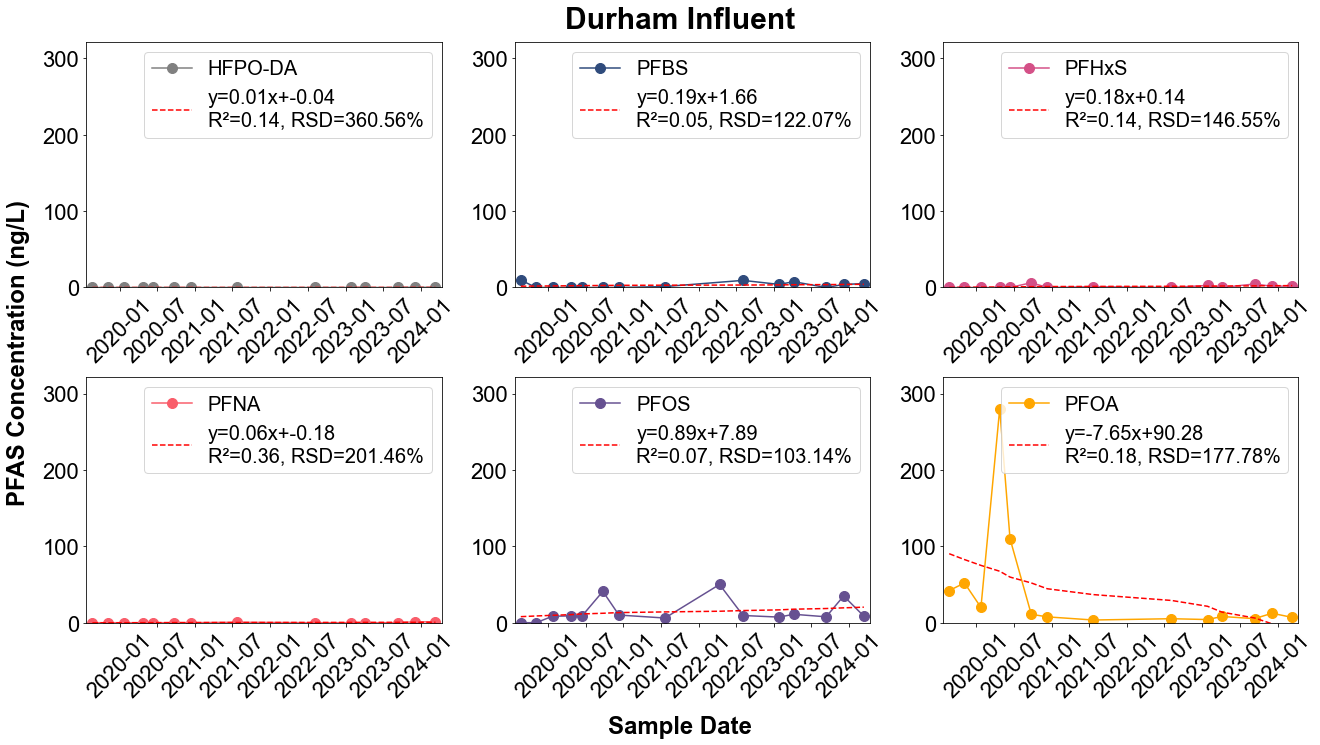

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


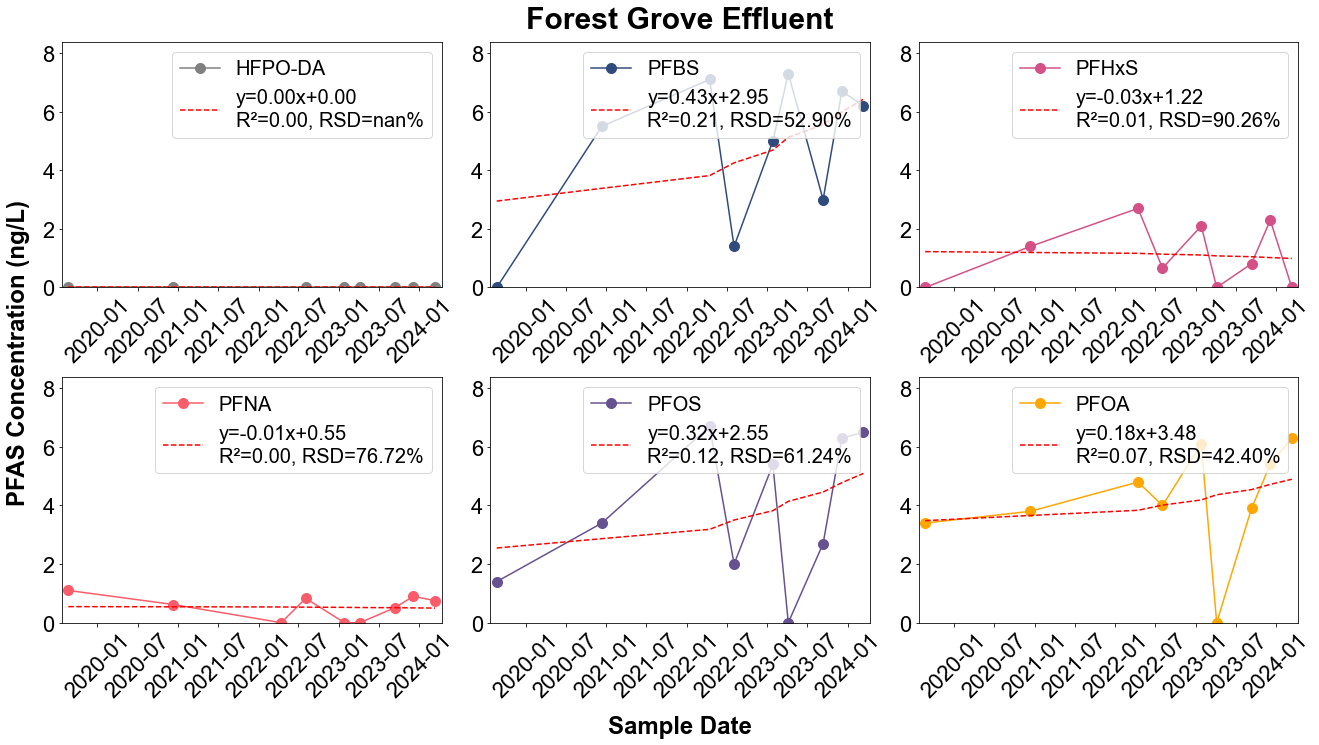

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


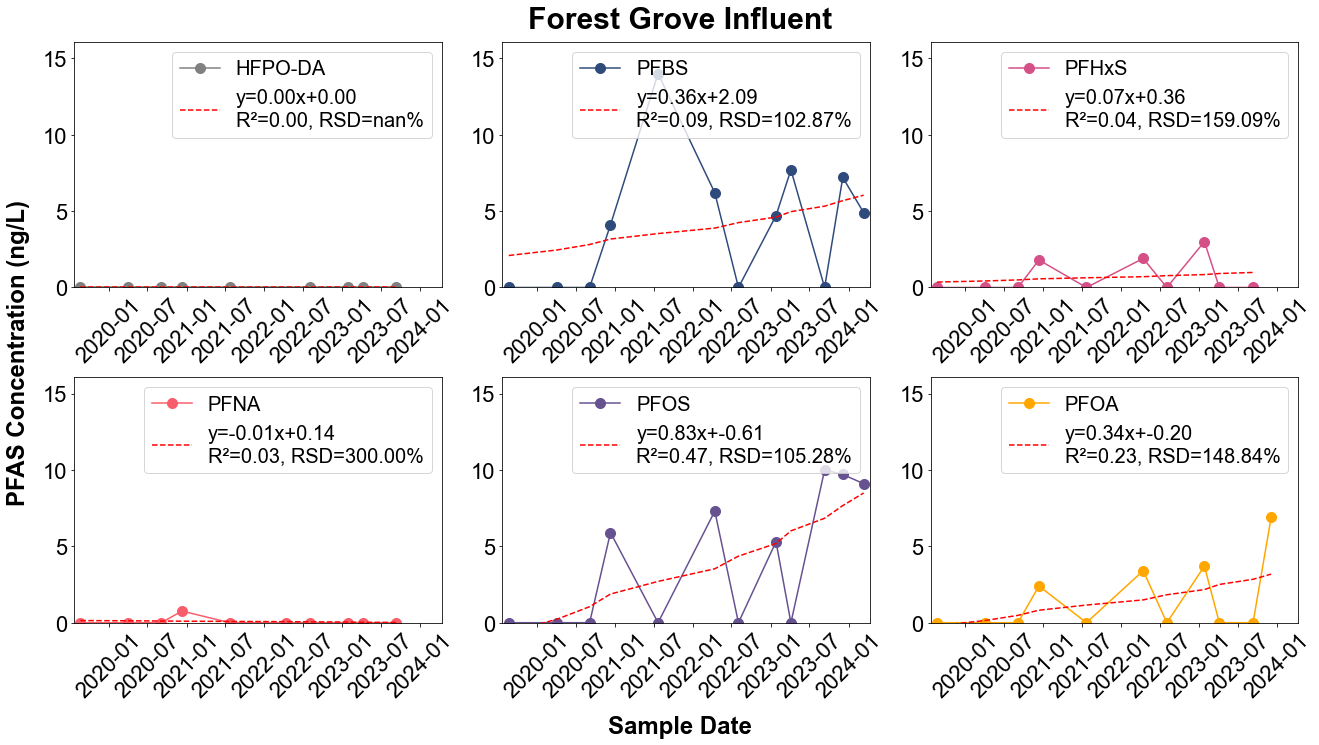

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


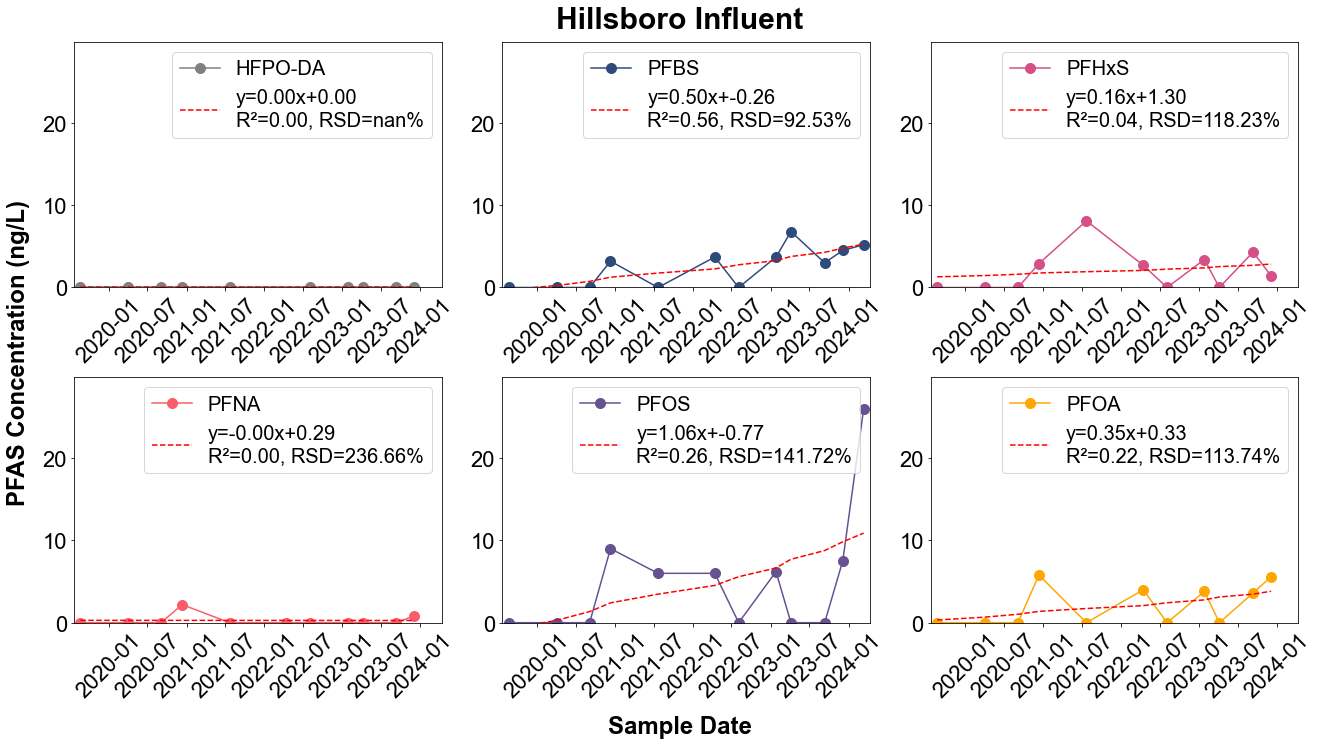

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


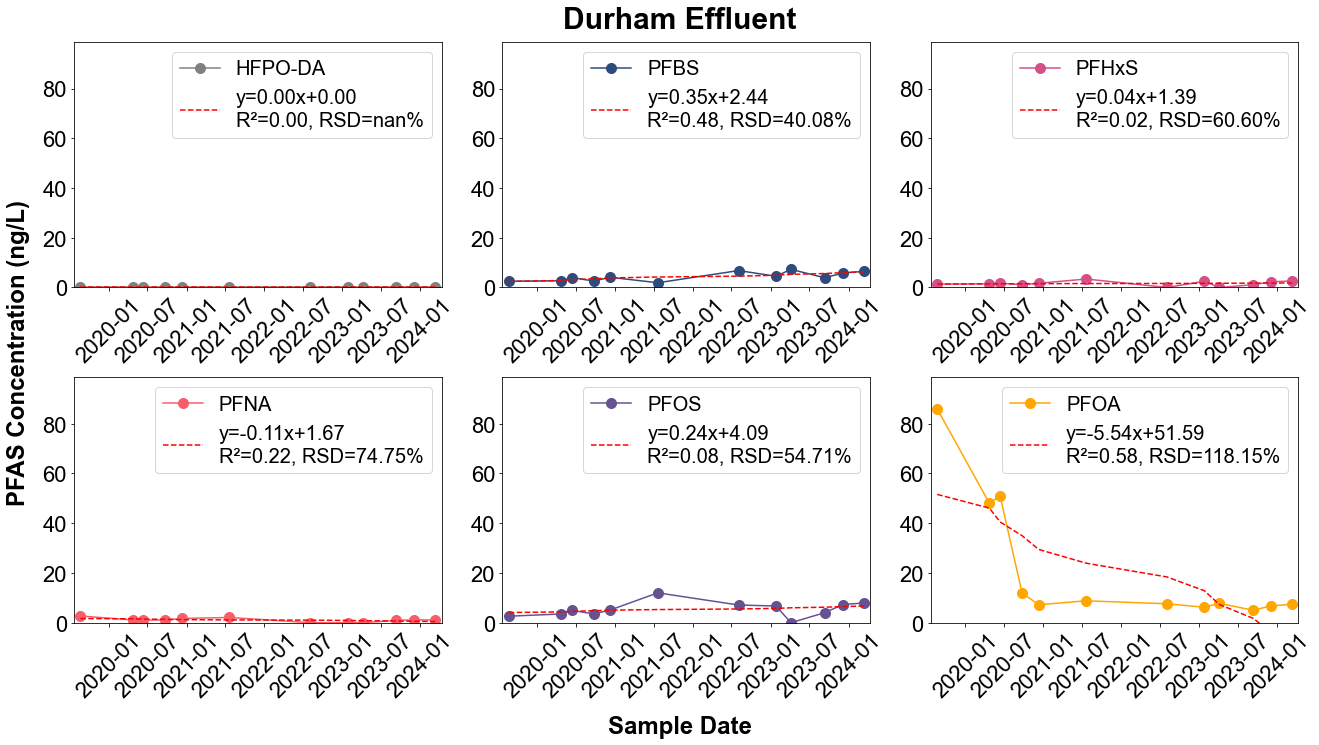

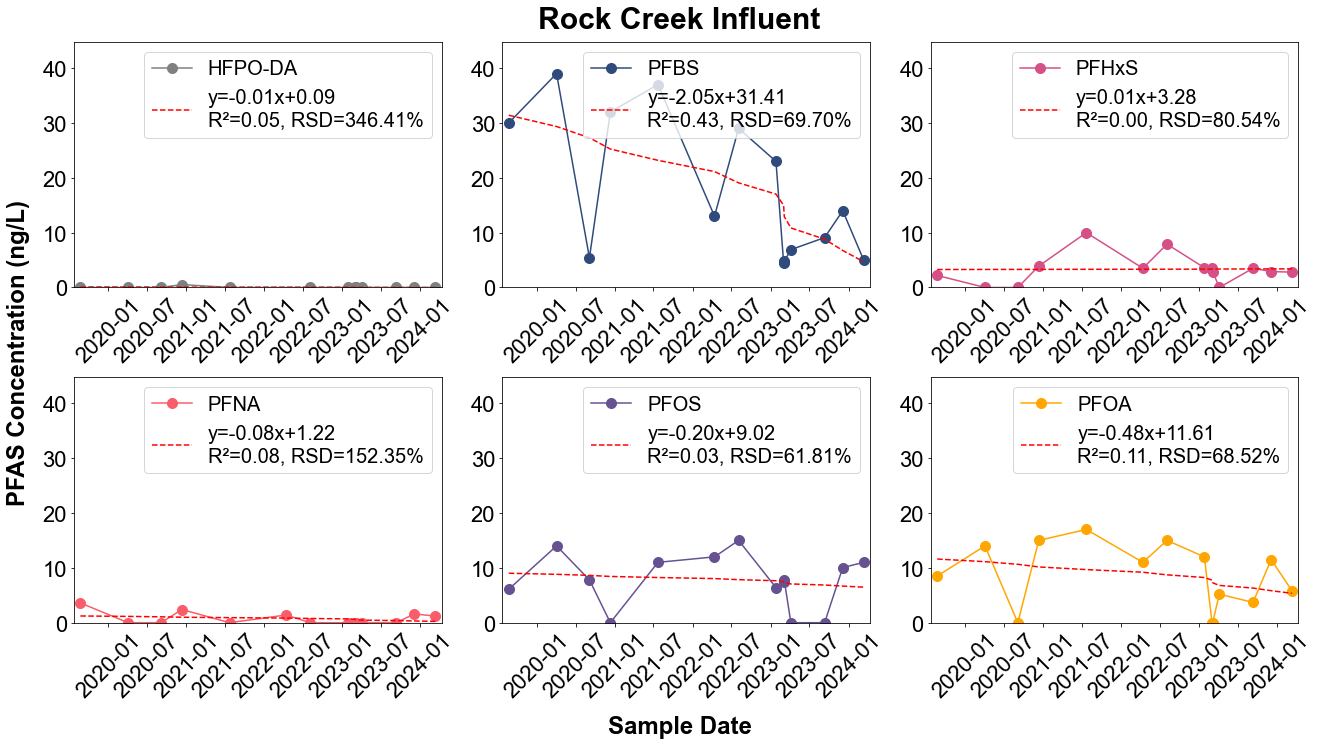

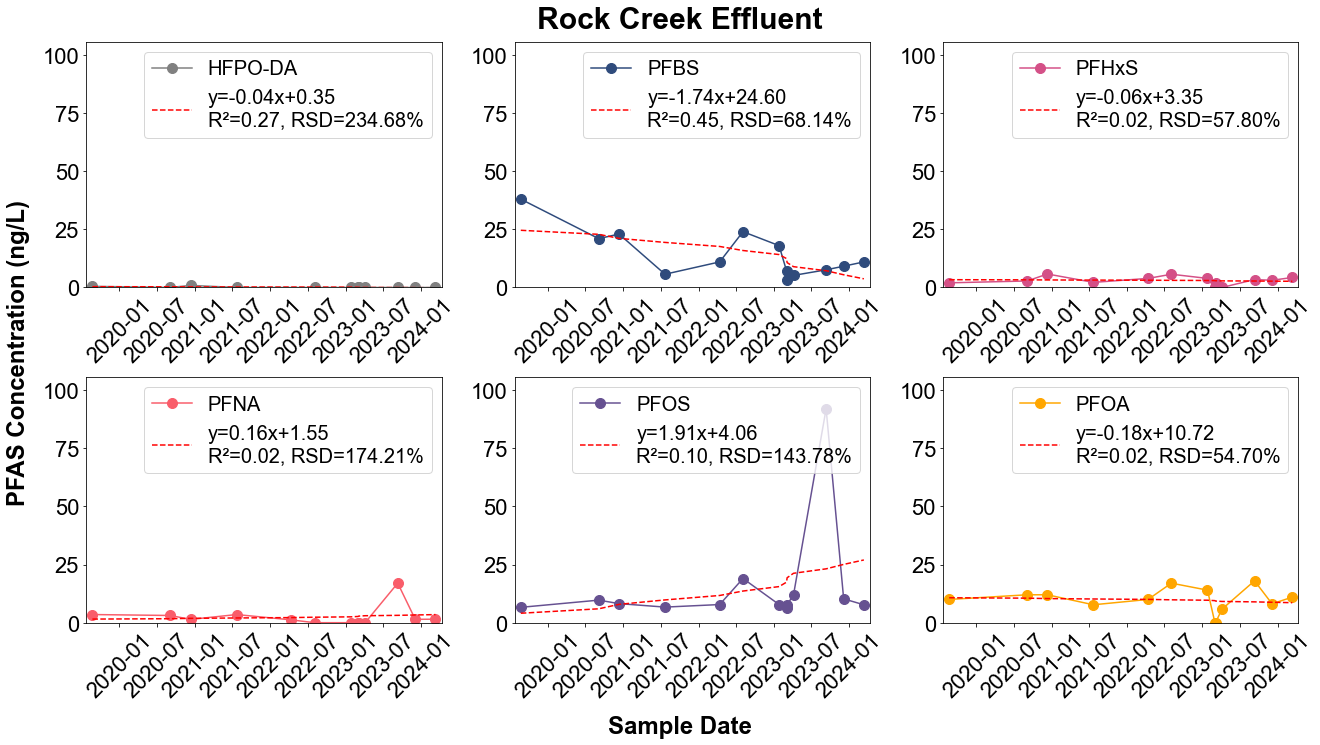

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


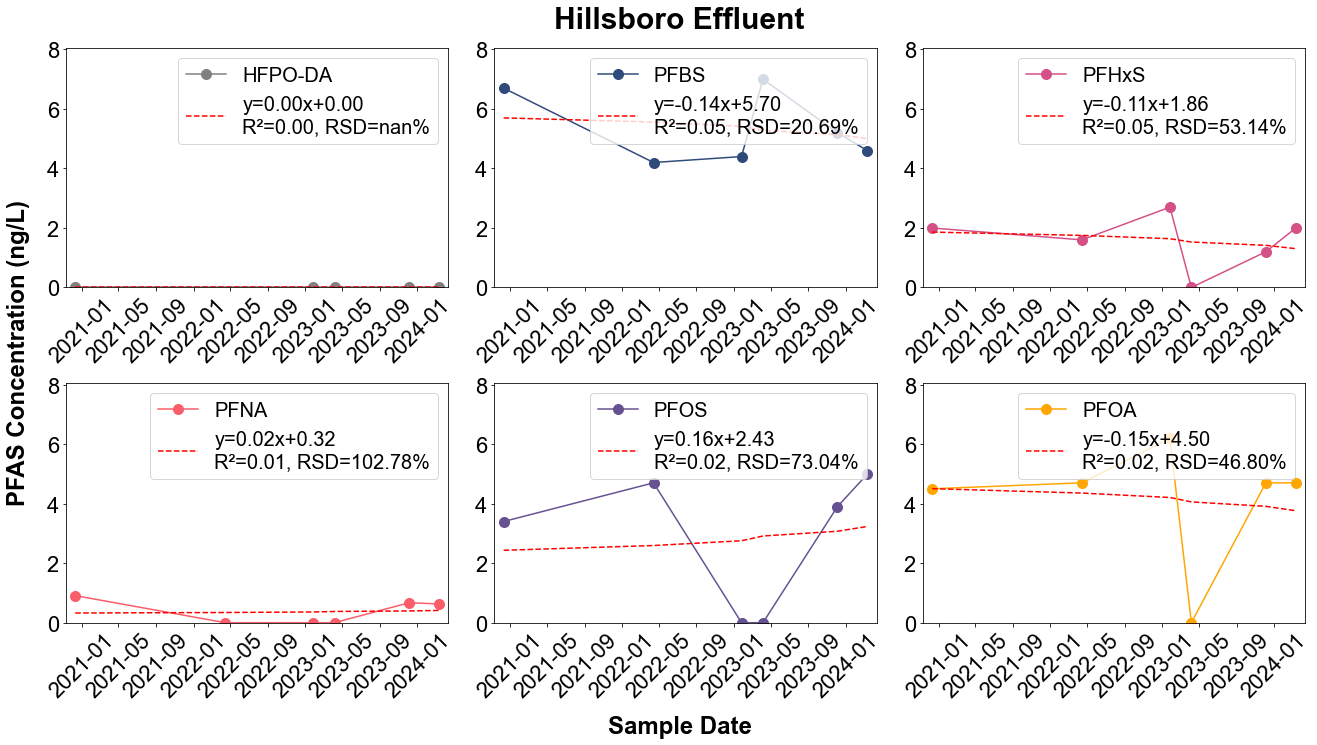

In [ ]:
for location in sample_locations:
    plot_pfas_concentration_vs_date(df=location_tables[location], color_dict=new_color_dict,figsize=(18, 10), ncols=3, nrows=2, title=location)

#### Plots for Precursor compounds

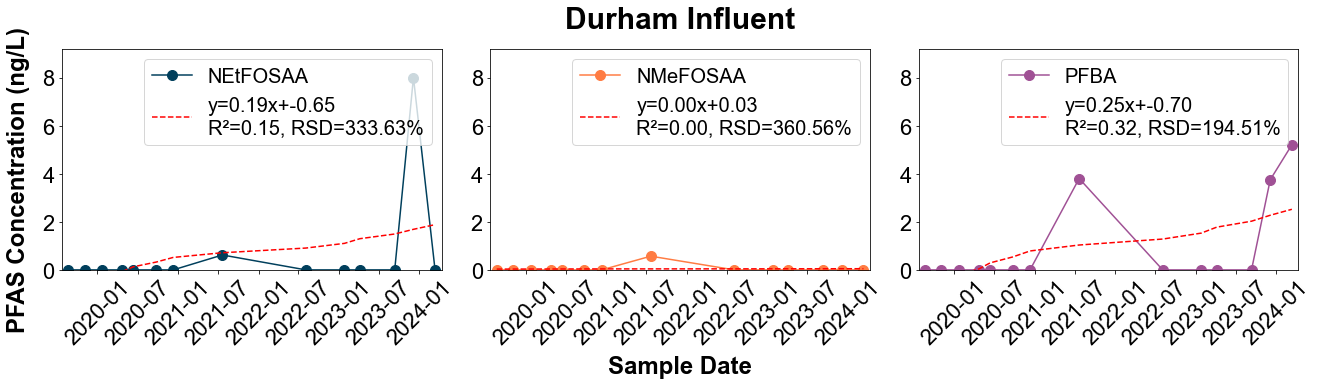

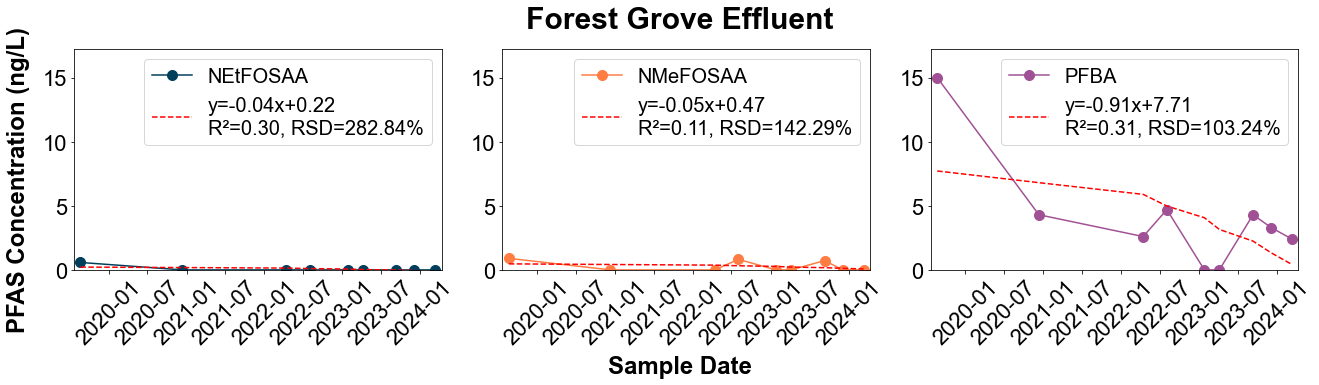

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD
<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


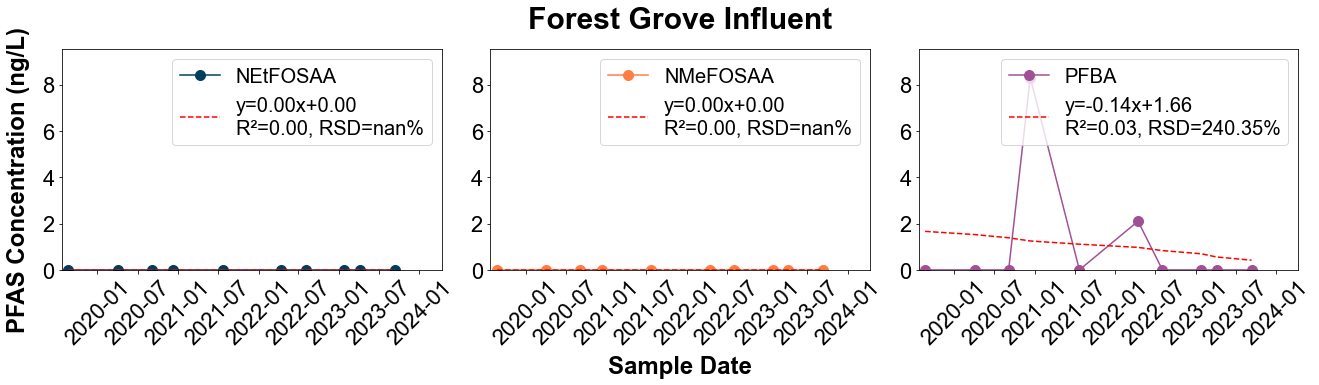

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD
<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


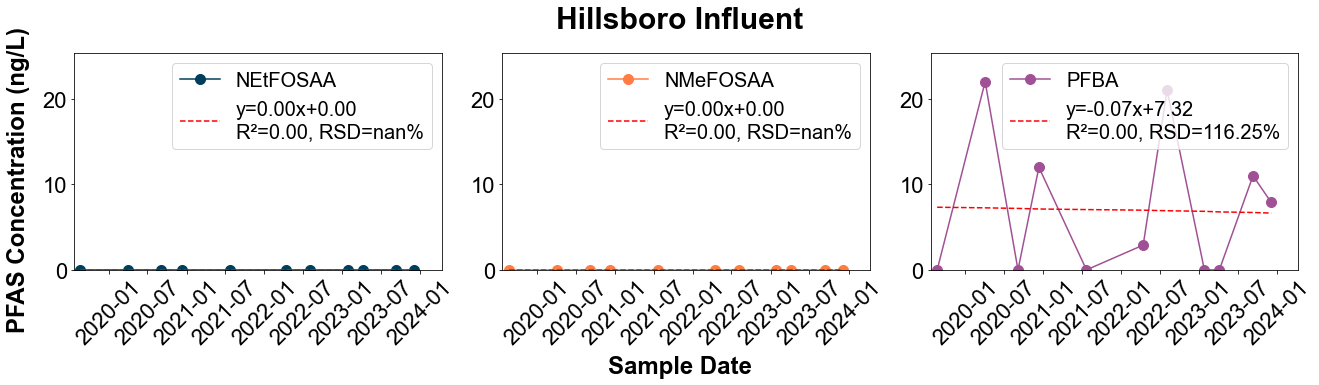

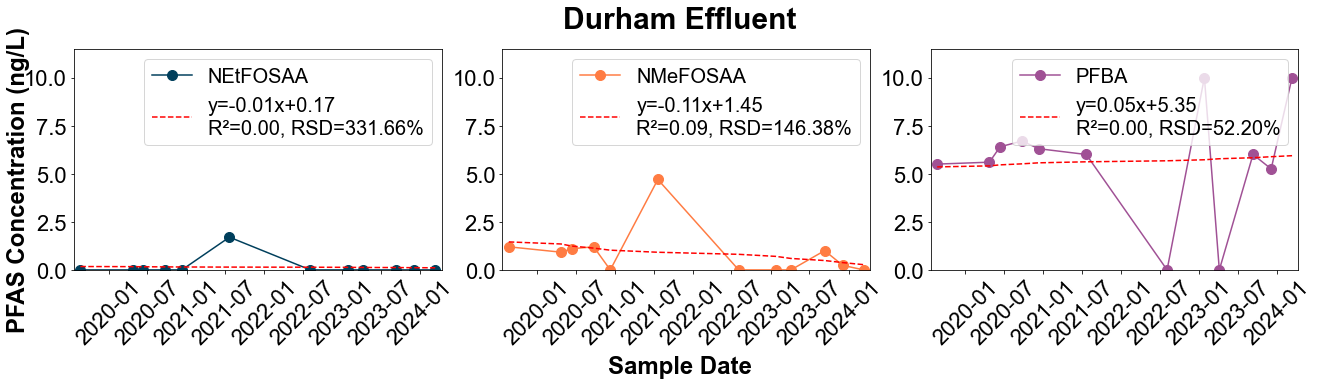

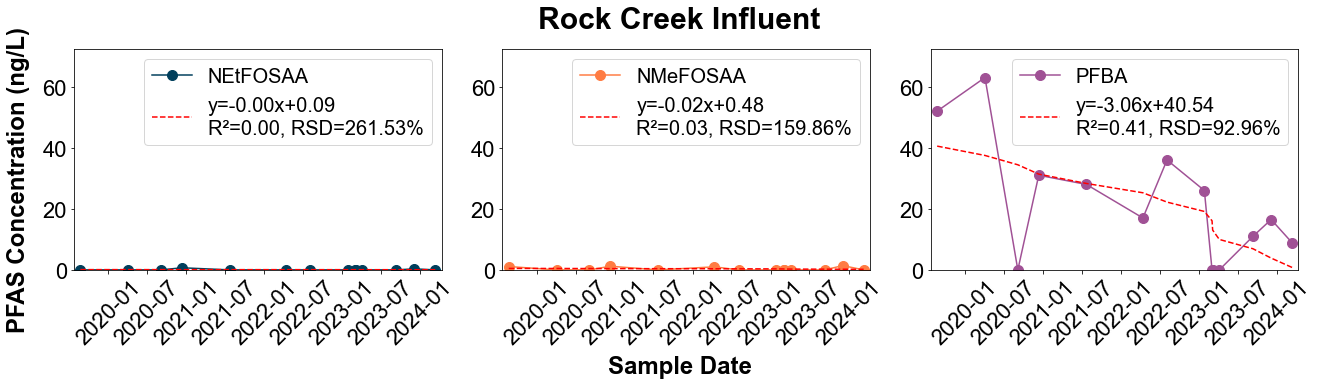

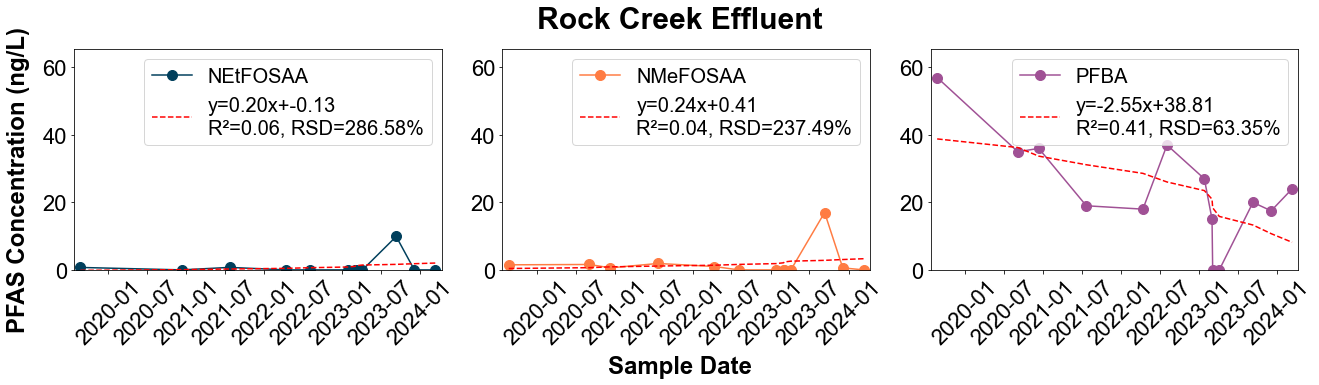

<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD
<ipython-input-185-89a103eee920>:44: RuntimeWarning: invalid value encountered in double_scalars
  rsd = np.std(y) / np.mean(y) * 100  # Calculate RSD


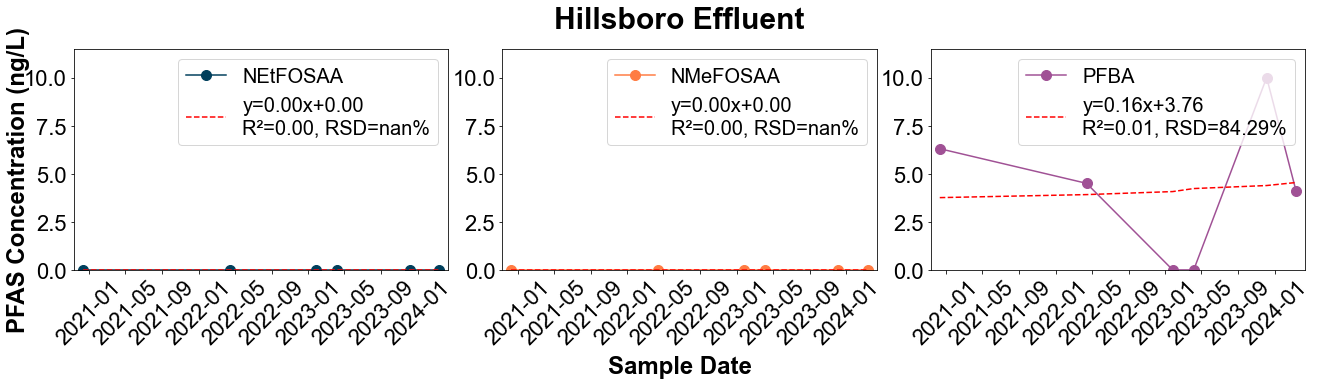

In [ ]:
for location in sample_locations:
    plot_pfas_concentration_vs_date(df=location_tables_Pre[location], color_dict=new_color_dict,figsize=(18, 5), ncols=3, nrows=1, title=location)

### Timeseries Decomposition